# Time Series Forecasting

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [ ]:
df = pd.read_excel('./sample_superstore.xls')
# Only work on Furniture Category
furniture = df.loc[df['Category'] == 'Furniture']
# Display your data after filter
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Data Preprocessing
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [ ]:
# Select 2 column "Order Date", "Sales" and save result in furniture
# Your code here
furniture = furniture[["Order Date", "Sales"]]
# Sort New dataset by column "Order Date"
# Your code here
furniture = furniture.sort_values("Order Date")
furniture.head()

# Check for null value
# Hint: isnull
# Your code here
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [ ]:
# Want to check if there is 2, 3, ... deal on the same day
furniture['Order Date'].nunique()

889

In [ ]:
furniture.shape

(2121, 2)

In [ ]:
# Calculate total sales per day and save result in furniture
furniture = furniture.groupby('Order Date').sum()

In [ ]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [ ]:
furniture.shape

(889, 1)

## Convert the Date to Index

In [ ]:
# furniture = furniture.set_index('Order Date')
# furniture.index

In [ ]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


Our current datetime data can be tricky to work with, since there missing data of some days.

Therefore, we will use the average daily-sales value for that month instead, and we are using the start of each month as the timestamp.

In [ ]:
# Resample data by month and calculate mean for each month
y = furniture.resample('MS').mean()

In [ ]:
y['2017':]

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


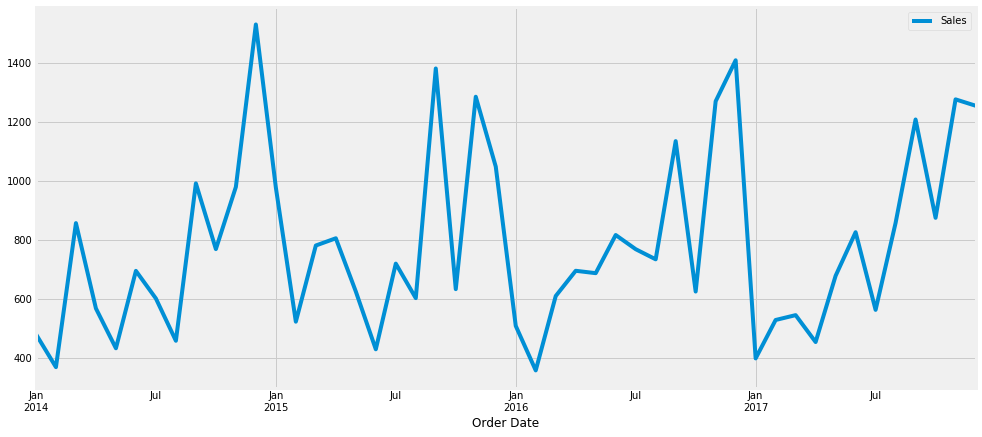

In [ ]:
y.plot(figsize=(15, 7))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

## Decomposing Time Series

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

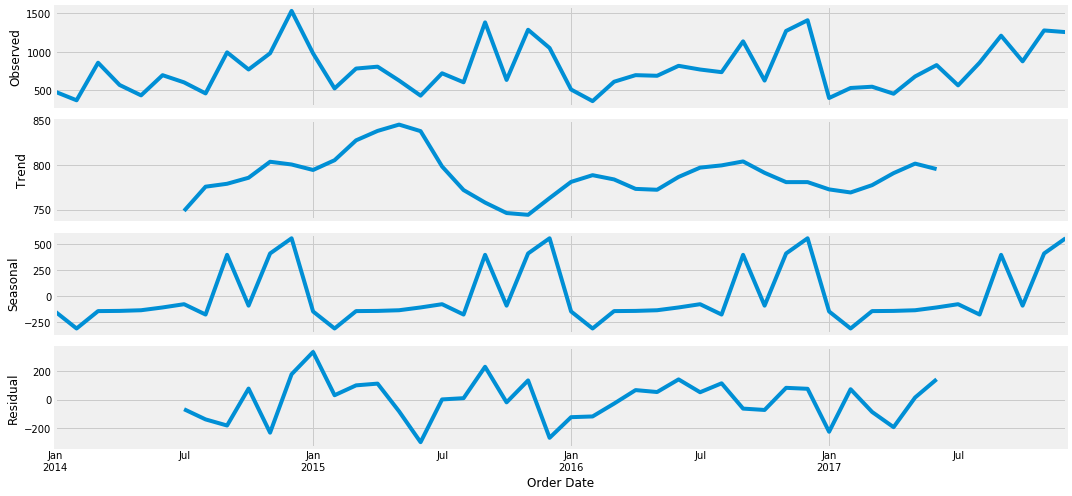

In [ ]:
# Import seasonal_decompose from statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'figure.figsize': (15,7), 'font.size': 10})
# Plot decompose diagram using seasonal_decompose
decomposition = seasonal_decompose(y)
fig = decomposition.plot();

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

## Time Series Forecasting

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation `ARIMA(p, d, q)`.

## Fitting the Model

Now, it's time to fit the model

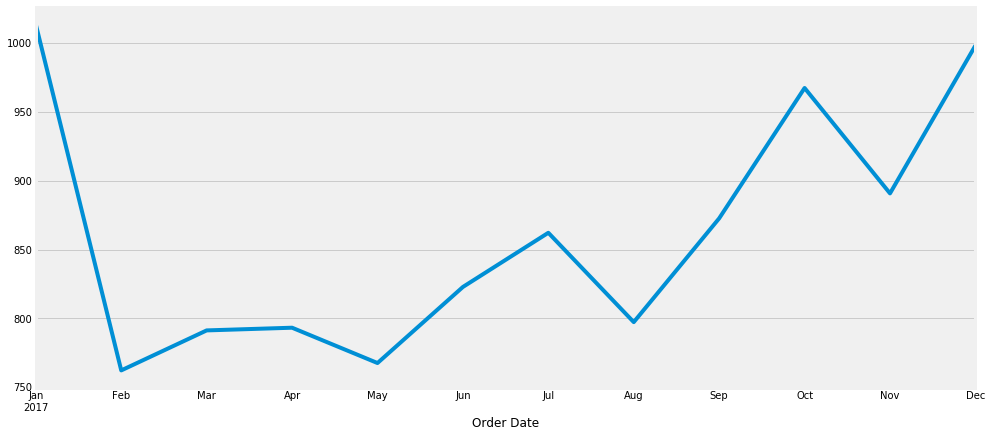

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# Import ARIMA from statsmodels.tsa.arima_model

# Create model
mod = ARIMA(y, order=(1, 1, 1))
# Train model
model_fit = mod.fit()

# make prediction
pred = model_fit.predict(start=pd.to_datetime('2017-01-01'), typ='levels')
pred.plot()

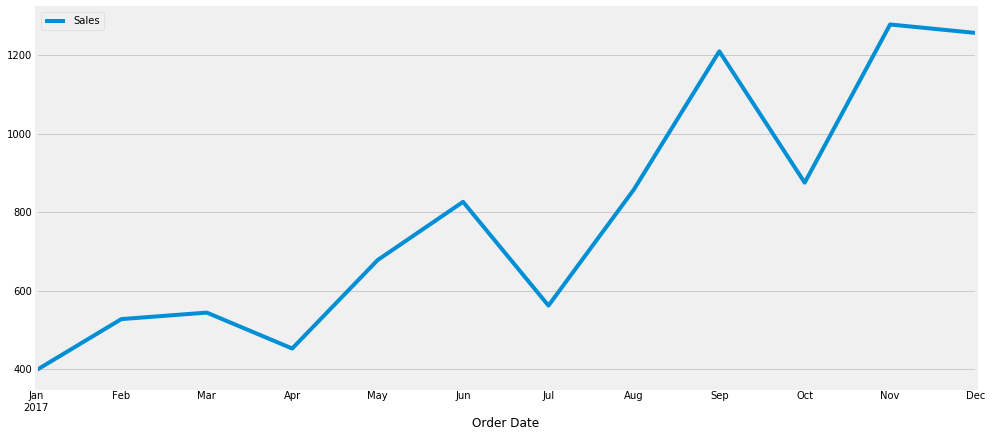

In [ ]:
y['2017':].plot()